In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# 学習に用いるあやめのデータセット

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

# data :データ(4列)
# feature_names: データの各列に対応する特徴量の名前
# ['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)']
# target: どういうクラスに分類されているかを示す。
# target_names: 各クラス分類に対応する名前
# ['setosa', 'versicolor', 'virginica']
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# irisデータセットは、target(データの分類)が0,1,2の3つあり、各50個ずつデータが格納されている。
# 今回は、target=1,2('versicolor', 'virginica')のみ使うので、50行目以降のデータを抽出してベクトル化
# さらに、'petal length (cm)',  'petal width (cm)'のみを扱うので2列以降のデータを取得
x = iris.data[50:,2:]

# target=1,2を扱うが、分類を０と１にしたいので、－１する。
y = iris.target[50:] -1

In [4]:
x

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

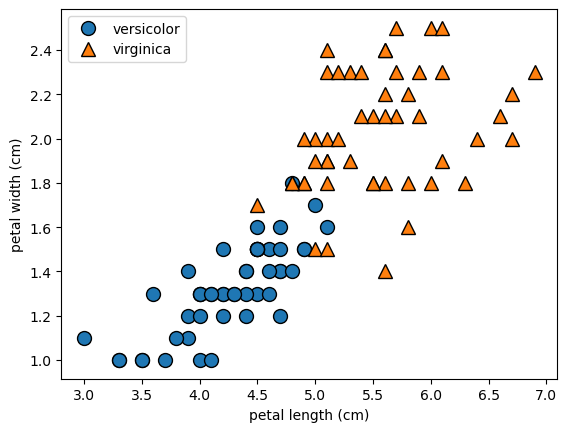

In [6]:
# mglearnを使って散布図を描画

# xの0列目は、'petal length (cm)', 1列目は 'petal width (cm)'のデータ
mglearn.discrete_scatter(x[:,0],x[:,1],y)

# yに格納されている値で、0は、'versicolor', 1は'virginica'を意味する
plt.legend(['versicolor','virginica'],loc='best')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()

In [7]:
# テストデータとトレーニングデータに分割する
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=0)

In [8]:
# LinearSVC学習を実行
svm = LinearSVC().fit(x_train,y_train)

C:\Users\kkrsk\miniconda3\envs\ML_Youtube\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
# どういう風に分類したか図示する関数
def plot_separator(model):
    #グラフのサイズを指定
    plt.figure(figsize=(10,6))
    
    # どういう風に分類したか図示する関数
    mglearn.plots.plot_2d_separator(model,x)
    
    #散布図を描画
    mglearn.discrete_scatter(x[:,0],x[:,1],y)
    
    #軸の名前
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    
    #表示範囲
    plt.xlim(2.8,7.0)
    plt.ylim(0.8,2.6)
    
    plt.show()

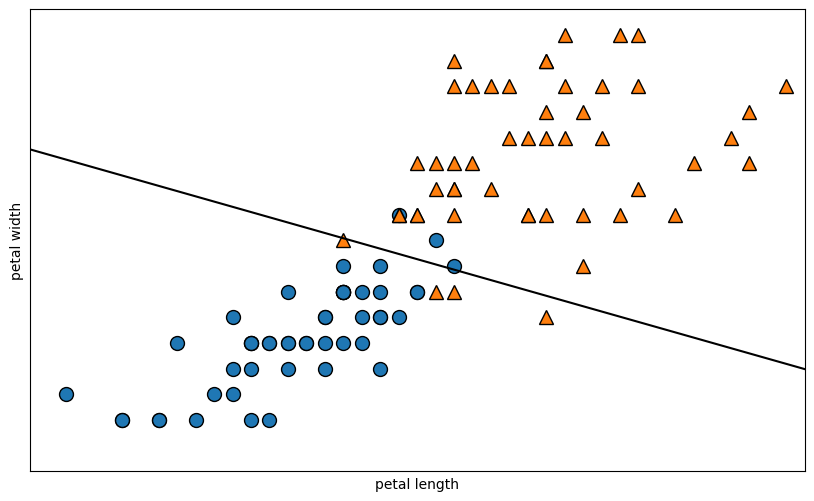

In [10]:
# グラフを描画
plot_separator(svm)

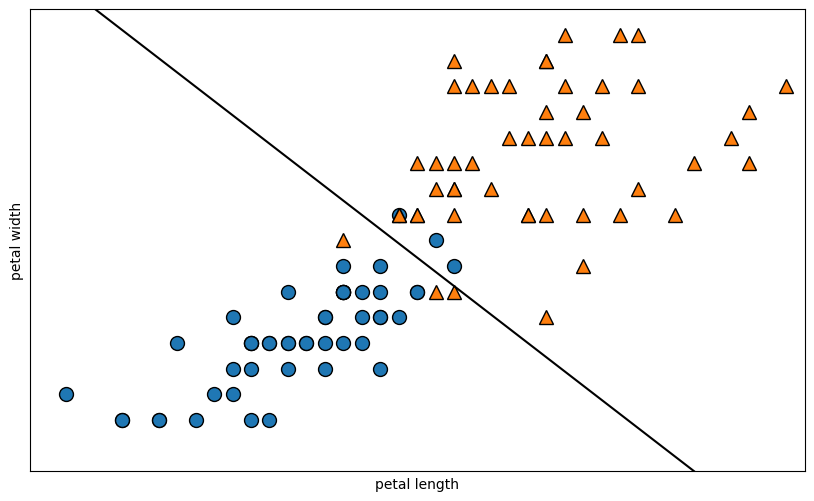

In [11]:
# ペナルティの度合い：ハイパーパラメータＣをいじってどれくらい予測の違いがでるのか
# デフォルトはＣ＝１
# 再度、学習を実行

# 下記のメッセージが表示される場合は、max_iterでiterationsを調整できる。
# ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
svm_100 = LinearSVC(C=100, max_iter=100000).fit(x_train,y_train)

plot_separator(svm_100)

In [12]:
# score(正しく分類できた割合)を見てみる
# C=1の場合
print('score on training set : {:.2f}'.format(svm.score(x_train,y_train)))
print('score on test set : {:.2f}'.format(svm.score(x_test,y_test)))

score on training set : 0.91
score on test set : 1.00


In [13]:
# C=100の場合
print('score on training set : {:.2f}'.format(svm_100.score(x_train,y_train)))
print('score on test set : {:.2f}'.format(svm_100.score(x_test,y_test)))

score on training set : 0.92
score on test set : 1.00


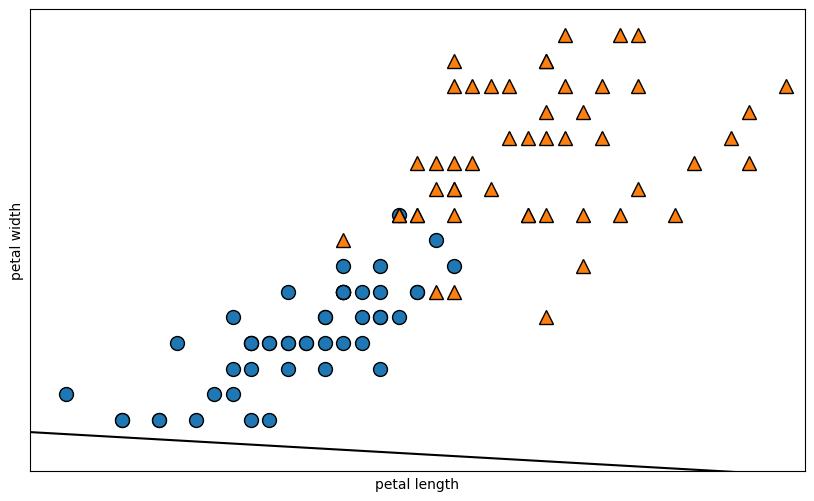

In [14]:
# C=0.01の場合
svm_001 = LinearSVC(C=0.01).fit(x_train,y_train)

plot_separator(svm_001)

In [15]:
# C=0.01の場合
print('score on training set : {:.2f}'.format(svm_001.score(x_train,y_train)))
print('score on test set : {:.2f}'.format(svm_001.score(x_test,y_test)))

score on training set : 0.51
score on test set : 0.48
